/home/ziyu/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-08-22 03:06:34.819019: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-22 03:06:34.865237: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-22 03:06:35.521424: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find Ten

error loading language detector, skip
finish copy
9936897
Model parameters: 67,060,225
Context length: 77
Vocab size: 49408
game_Sicilian_Defense.pgn


2023-08-22 03:07:15.134182: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 47611 MB memory:  -> device: 0, name: NVIDIA A800-SXM4-80GB, pci bus id: 0000:0d:00.0, compute capability: 8.0
2023-08-22 03:07:15.135418: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 50466 MB memory:  -> device: 1, name: NVIDIA A800-SXM4-80GB, pci bus id: 0000:13:00.0, compute capability: 8.0
2023-08-22 03:07:15.136650: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 50592 MB memory:  -> device: 2, name: NVIDIA A800-SXM4-80GB, pci bus id: 0000:29:00.0, compute capability: 8.0
2023-08-22 03:07:15.138076: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 50282 MB memory:  -> device: 3, name: NVIDIA A800-SXM4-80GB, pci bu

game_Caro_Kann_Defense.pgn
game_Scandinavian_Defense.pgn
game_English_Opening.pgn
game_French_Defense.pgn
game_Philidor_Defense.pgn
game_Queens_Gambit.pgn
game_Queens_Indian_Defense.pgn
game_London_System.pgn
game_Italian_Game.pgn


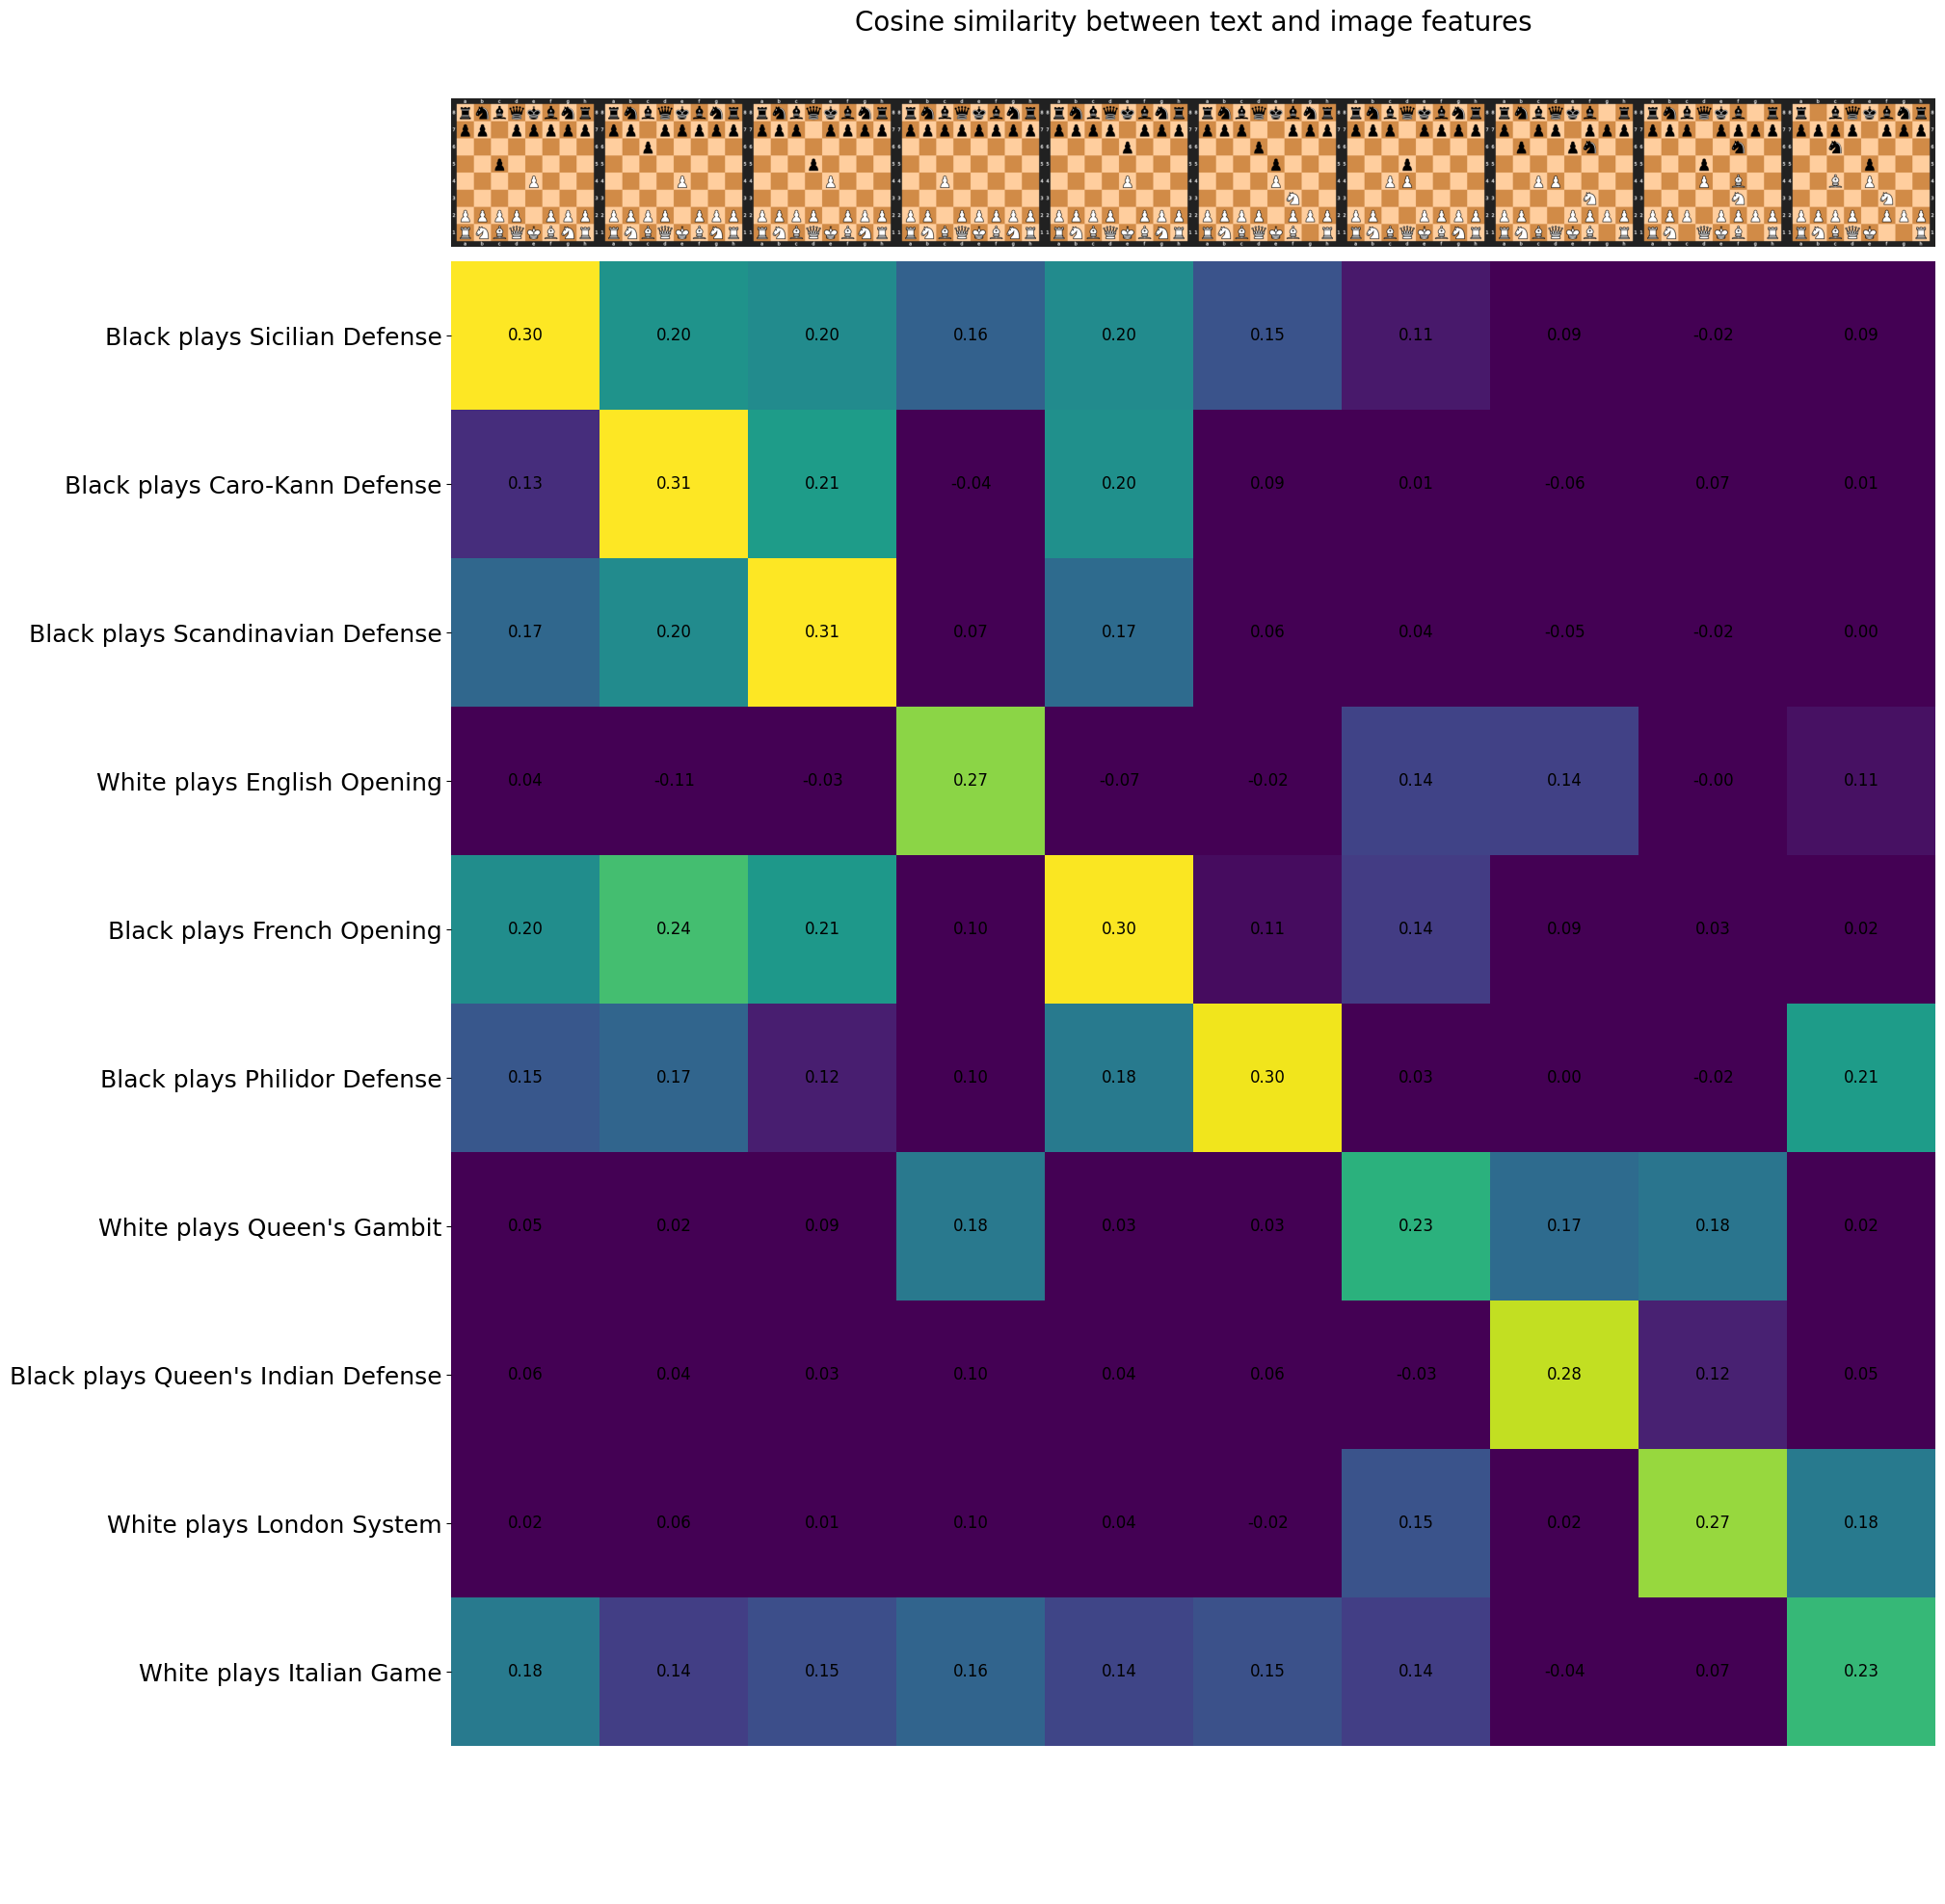

In [1]:
import sys
import os
sys.path.append('./chessclip/src')
import torch
import io
import chess.pgn
import numpy as np
from chess_ai.feature_converter import get_lc0_input_planes_tf
from chess_ai.datasets.tfds.pgn_base import generate_examples_from_game_no_comment

import open_clip
from open_clip.factory import get_tokenizer, load_checkpoint

# init
model_name = 'chessclip-quickgelu'
model = open_clip.create_model(model_name, pretrained='openai')
tokenizer = get_tokenizer(model_name)

# load model
load_checkpoint(model, '../epoch_latest.pt')

# check parameters
model.eval()
context_length = model.text.context_length
vocab_size = model.text.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Context length:", context_length)
print("Vocab size:", vocab_size)

# generate board/action embedding based on pgn string
def generate_representation_for_final(pgn):
    game = chess.pgn.read_game(io.StringIO(pgn))
    data = list(generate_examples_from_game_no_comment(game))[-1]
    for key in data.keys():
        data[key] = np.array(data[key])
    board = get_lc0_input_planes_tf(data).numpy()
    action = data['probs']
    return board, action

descriptions = {
    "Sicilian_Defense": "Black plays Sicilian Defense",
    "Caro_Kann_Defense": "Black plays Caro-Kann Defense",
    "Scandinavian_Defense": "Black plays Scandinavian Defense",
    "English_Opening": "White plays English Opening",
    "French_Defense": "Black plays French Opening",
    "Philidor_Defense": "Black plays Philidor Defense",
    "Queens_Gambit": "White plays Queen's Gambit",
    "Queens_Indian_Defense": "Black plays Queen's Indian Defense",
    "London_System": "White plays London System",
    "Italian_Game": "White plays Italian Game",
}

os.makedirs('./game_pgns/images/', exist_ok=True)

# generate plots for those openings
for key in descriptions.keys():
    name = 'game_' + key
    with open(os.path.join('./game_pgns/', name + ".pgn"), "rt") as f:
        pgn = f.read()
    game = chess.pgn.read_game(io.StringIO(pgn))
    game = game.end()
    boardsvg = chess.svg.board(game.board(), size=350)
    outputfile = open('./game_pgns/images/' + name + '.svg', "w")
    outputfile.write(boardsvg)
    outputfile.close()

import cairosvg
# conver svg images to png files
for key in descriptions.keys():
    name = 'game_' + key
    path = './game_pgns/images/' + name + '.svg'
    out_path = './game_pgns/images/' + name + '.png'
    cairosvg.svg2png(
        url=path, write_to=out_path)

descriptions = {
    "Sicilian_Defense": "Black plays Sicilian Defense",
    "Caro_Kann_Defense": "Black plays Caro-Kann Defense",
    "Scandinavian_Defense": "Black plays Scandinavian Defense",
    "English_Opening": "White plays English Opening",
    "French_Defense": "Black plays French Opening",
    "Philidor_Defense": "Black plays Philidor Defense",
    "Queens_Gambit": "White plays Queen's Gambit",
    "Queens_Indian_Defense": "Black plays Queen's Indian Defense",
    "London_System": "White plays London System",
    "Italian_Game": "White plays Italian Game",
}

# generate plots for those openings
for key in descriptions.keys():
    name = 'game_' + key
    with open(os.path.join('./game_pgns/', name + ".pgn"), "rt") as f:
        pgn = f.read()
    game = chess.pgn.read_game(io.StringIO(pgn))
    game = game.end()
    boardsvg = chess.svg.board(game.board(), size=350)
    outputfile = open('./game_pgns/images/' + name + '.svg', "w")
    outputfile.write(boardsvg)
    outputfile.close()

import cairosvg
# conver svg images to png files
for key in descriptions.keys():
    name = 'game_' + key
    path = './game_pgns/images/' + name + '.svg'
    out_path = './game_pgns/images/' + name + '.png'
    cairosvg.svg2png(
        url=path, write_to=out_path)

boards = []
actions = []
for key in descriptions.keys():
    name = 'game_' + key + '.pgn'
    print(name)
    with open(os.path.join('./game_pgns/', name), "rt") as f:
        pgn = f.read()
    board, action = generate_representation_for_final(pgn)
    boards.append(torch.from_numpy(board))
    actions.append(torch.from_numpy(action))

texts = []   
for name in descriptions:
    texts.append(descriptions[name])

import IPython.display
import matplotlib.pyplot as plt
from PIL import Image

original_images = []
for key in descriptions.keys():
    name = 'game_' + key
    out_path = './game_pgns/images/' + name + '.png'
    original_images.append(Image.open(out_path).convert("RGB"))

image_input = torch.stack(boards)
action_input = torch.stack(actions)
text_tokens = tokenizer([desc for desc in texts])
with torch.no_grad():
    image_features = model.encode_image((image_input, action_input)).float()
    text_features = model.encode_text(text_tokens).float()

image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T

count = len(descriptions)

plt.figure(figsize=(20, 25))
plt.imshow(similarity, vmin=0.1, vmax=0.3)
plt.yticks(range(count), texts, fontsize=18)
plt.xticks([])
for i, image in enumerate(original_images):
    plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")
for x in range(similarity.shape[1]):
    for y in range(similarity.shape[0]):
        plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=12)

for side in ["left", "top", "right", "bottom"]:
  plt.gca().spines[side].set_visible(False)

plt.xlim([-0.5, count - 0.5])
plt.ylim([count + 0.5, -2])

plt.title("Cosine similarity between text and image features", size=20)
plt.savefig('./result.pdf',bbox_inches='tight', pad_inches = 0.3)

